# Activating Your First Neural Network

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/lharris/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Import Sequential and Dense from Tensorflow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Using a Single Neuron for Binary Classification

### Creating Dummy Data

In [3]:
# Generate 1000 demo data samples with 3 input features
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1)

In [4]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2", "Feature 3"])
df["Target"] = y
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,0.389268,-0.574220,0.692881,1
1,0.086010,0.598617,-0.610910,0
2,1.074390,0.923824,-0.729487,0
3,1.369456,-1.024232,1.388817,1
4,0.623477,1.542087,-1.482713,0


### Data Preprocessing

Use `train_test_split` to create training and testing data.

In [5]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

 Scale the data using the `StandarScaler`.

In [6]:
# Create scaler instance
X_scaler = StandardScaler()

In [7]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [8]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Neural Network Model Creation

In [9]:
# Create a sequential model
neuron = Sequential()

#### Add the first layer of our neural network.

In [10]:
# First layer
number_inputs = 3
number_hidden_nodes = 6

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

#### We finish creating our neural network by adding the output layer.

In [11]:
# Output layer
output_nodes = 1

neuron.add(Dense(units=output_nodes, activation="sigmoid"))

In [12]:
# Model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


 ### Compile the Model

In [13]:
# Compile model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

 ### Fit the Model

In [14]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 955us/step - loss: 0.9124 - accuracy: 0.2507
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8610 - accuracy: 0.3040
Epoch 3/100
24/24 [==============================] - 0s 965us/step - loss: 0.8158 - accuracy: 0.3760
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7762 - accuracy: 0.4200
Epoch 5/100
24/24 [==============================] - 0s 993us/step - loss: 0.7414 - accuracy: 0.4480
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7116 - accuracy: 0.4800
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.4853
Epoch 8/100
24/24 [==============================] - 0s 999us/step - loss: 0.6637 - accuracy: 0.4920
Epoch 9/100
24/24 [==============================] - 0s 979us/step - loss: 0.6429 - accuracy: 0.5080
Epoch 10/100
24/24 [==============================] - 0s 968us/step - loss: 0.6242 - accuracy: 0.54

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

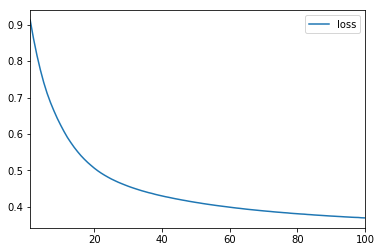

In [15]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

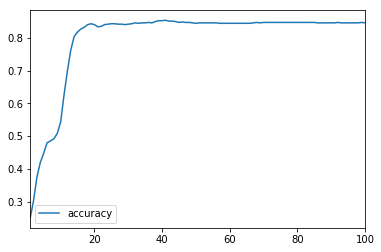

In [16]:
# Plot the accuracy
df.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [17]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.3357 - accuracy: 0.8440
Loss: 0.33567014336586, Accuracy: 0.843999981880188


 ### Making Predictions

In [18]:
# Making predictions
predictions = (neuron.predict(X_test_scaled) > 0.5).astype("int32")
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test.ravel()})
results.head(10)

,predictions,actual
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,0,1
8,1,1
9,1,1
